In [4]:
import pandas as pd
import xarray as xr

In [5]:
crops_df = pd.read_csv(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\cropbasics_scrape.csv')
crops_df

,crop_code,species,Life.form,Habit,Life.span,Physiology,Category,Plant.attributes,temp_opt_min,Temp_Opt_Max,...,Subsystem,Companion.species,Level.of.mechanization,Labour.intensity,cycle_min,cycle_max,use.main,use.detailed,use.part,datasheet_url
0,289,Abelmoschus esculentus,herb,erect,annual,single stem,vegetables,grown on large scale,20,30,...,Subsystem,Companion species,Level of mechanization,Labour intensity,50,180,food & beverage,vitamins,fruits,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
1,290,Abelmoschus manihot,shrub,erect,"annual, perennial",NaN,"vegetables, ornamentals/turf, medicinals & aro...",grown on small scale,22,30,...,Subsystem,Companion species,Level of mechanization,Labour intensity,365,365,food & beverage,vitamins,leaves,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
2,291,Abelmoschus moschatus,"herb, sub-shrub",prostrate/procumbent/semi-erect,"annual, biennial, perennial","deciduous, multi stem","ornamentals/turf, medicinals & aromatic",NaN,20,30,...,Subsystem,Companion species,Level of mechanization,Labour intensity,0,0,environmental,ornamental/turf,entire plant,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
3,295,Acacia auriculiformis,tree,erect,perennial,single stem,forest/wood,grown on large scale,24,32,...,Subsystem,Companion species,Level of mechanization,Labour intensity,180,240,material,dye/tannin,stems,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
4,297,Acacia farnesiana,tree,erect,perennial,single stem,"materials, ornamentals/turf, medicinals & arom...",grown on small scale,20,32,...,Subsystem,Companion species,Level of mechanization,Labour intensity,60,240,environmental,ornamental/turf,entire plant,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,400000,Chamaecrista rotundifolia,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,Subsystem,Companion species,Level of mechanization,Labour intensity,0,0,NaN,NaN,NaN,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
2564,400001,Acacia polyacantha,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,Subsystem,Companion species,Level of mechanization,Labour intensity,0,0,NaN,NaN,NaN,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
2565,400002,Prosopis affinis,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,Subsystem,Companion species,Level of mechanization,Labour intensity,0,0,NaN,NaN,NaN,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...
2566,400003,Vicia dasycarpa,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,Subsystem,Companion species,Level of mechanization,Labour intensity,0,0,NaN,NaN,NaN,http://ecocrop.fao.org/ecocrop/srv/en/dataShee...


In [6]:
crops_df.columns

Index(['crop_code', 'species', 'Life.form', 'Habit', 'Life.span', 'Physiology',
       'Category', 'Plant.attributes', 'temp_opt_min', 'Temp_Opt_Max',
       'Temp_Abs_Min', 'Temp_Abs_Max', 'Rain_Opt_Min', 'Rain_Opt_Max',
       'Rain_Abs_Min', 'Rain_Abs_Max', 'Lat_Opt_Min', 'Lat_Opt_Max',
       'Lat_Abs_Min', 'Lat_Abs_Max', 'Alt_Opt_Min', 'Alt_Opt_Max',
       'Alt_Abs_Min', 'Alt_Abs_Max', 'pH_Opt_Min', 'pH_Opt_Max', 'pH_Abs_Min',
       'pH_Abs_Max', 'Light_Opt_Min', 'Light_Opt_Max', 'Light_Abs_Min',
       'Light_Abs_Max', 'Depth_Opt', 'Depth_Abs', 'Texture_Ops', 'Texture_Abs',
       'Fertility_Ops', 'Fertility_Abs', 'Al_Toxicity_Opt', 'Al_Toxicity_Abs',
       'Salinity_Ops', 'Salinity_Abs', 'drainage_opt', 'drainage_abs',
       'Climate.Zone', 'photoperiod', 'Killing.temp..during.rest',
       'Killing.temp..early.growth', 'Abiotic.toler.', 'Abiotic.suscept.',
       'Introduction.risks.', 'Product..system', 'Cropping.system',
       'Subsystem', 'Companion.species', 'Level.of.

In [7]:
crop_subset_climate = crops_df[['species', 'Category', 'Climate.Zone']].dropna()
crop_subset_climate

,species,Category,Climate.Zone
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st..."
1,Abelmoschus manihot,"vegetables, ornamentals/turf, medicinals & aro...","tropical wet & dry (Aw), tropical wet (Ar)"
2,Abelmoschus moschatus,"ornamentals/turf, medicinals & aromatic",tropical wet & dry (Aw)
3,Acacia auriculiformis,forest/wood,"tropical wet & dry (Aw), tropical wet (Ar)"
4,Acacia farnesiana,"materials, ornamentals/turf, medicinals & arom...","tropical wet & dry (Aw), steppe or semiarid (B..."
...,...,...,...
2485,Vigna parkeri sp. acutifolia,"forage/pasture, environmental",tropical wet & dry (Aw)
2486,Zornia glabra,forage/pasture,"tropical wet & dry (Aw), tropical wet (Ar)"
2487,Trifolium glanduliferum,forage/pasture,"steppe or semiarid (Bs), subtropical dry summe..."
2488,Trifolium africanum,forage/pasture,subtropical humid (Cf)


In [8]:
crop_subset_climate['Climate.Zone'].unique()

array(['tropical wet & dry (Aw), tropical wet (Ar), steppe or semiarid (Bs), subtropical humid (Cf), subtropical dry summer (Cs), subtropical dry winter (Cw)',
       'tropical wet & dry (Aw), tropical wet (Ar)',
       'tropical wet & dry (Aw)',
       'tropical wet & dry (Aw), steppe or semiarid (Bs), subtropical dry summer (Cs)',
       'tropical wet & dry (Aw), steppe or semiarid (Bs)',
       'tropical wet & dry (Aw), tropical wet (Ar), subtropical humid (Cf)',
       'subtropical humid (Cf)', 'tropical wet (Ar)',
       'tropical wet & dry (Aw), subtropical humid (Cf)',
       'tropical wet & dry (Aw), subtropical humid (Cf), subtropical dry summer (Cs), subtropical dry winter (Cw)',
       'tropical wet & dry (Aw), steppe or semiarid (Bs), subtropical humid (Cf)',
       'subtropical dry summer (Cs)',
       'tropical wet & dry (Aw), subtropical humid (Cf), subtropical dry summer (Cs)',
       'tropical wet & dry (Aw), subtropical dry summer (Cs)',
       'tropical wet & dry (Aw

In [9]:
crop_subset_climate['Category'].unique()

array(['vegetables',
       'vegetables, ornamentals/turf, medicinals & aromatic',
       'ornamentals/turf, medicinals & aromatic', 'forest/wood',
       'materials, ornamentals/turf, medicinals & aromatic, environmental',
       'ornamentals/turf, forest/wood, environmental',
       'forage/pasture, vegetables, materials, ornamentals/turf, medicinals & aromatic, forest/wood, environmental',
       'forage/pasture', 'environmental', 'materials, environmental',
       'materials, forest/wood, environmental',
       'forage/pasture, materials, ornamentals/turf, medicinals & aromatic, forest/wood, environmental',
       'forest/wood, environmental', 'materials',
       'vegetables, medicinals & aromatic',
       'materials, ornamentals/turf, medicinals & aromatic, forest/wood',
       'cereals & pseudocereals, forage/pasture, vegetables',
       'fruits & nuts, medicinals & aromatic', 'fruits & nuts',
       'fruits & nuts, vegetables, medicinals & aromatic, environmental',
       'veget

In [10]:
#crop_subset_climate['Climate.List'] = crop_subset_climate['Climate.Zone'].apply(lambda x: x.split(","))
s = crop_subset_climate['Climate.Zone'].apply(lambda x: x.split(", ")).apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Climate'
crop_subset_climate2 = crop_subset_climate.join(s)
crop_subset_climate2

C:\Users\kat\AppData\Local\Temp\ipykernel_23584\719803992.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  s = crop_subset_climate['Climate.Zone'].apply(lambda x: x.split(", ")).apply(pd.Series, 1).stack()


,species,Category,Climate.Zone,Climate
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st...",tropical wet & dry (Aw)
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st...",tropical wet (Ar)
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st...",steppe or semiarid (Bs)
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st...",subtropical humid (Cf)
0,Abelmoschus esculentus,vegetables,"tropical wet & dry (Aw), tropical wet (Ar), st...",subtropical dry summer (Cs)
...,...,...,...,...
2487,Trifolium glanduliferum,forage/pasture,"steppe or semiarid (Bs), subtropical dry summe...",steppe or semiarid (Bs)
2487,Trifolium glanduliferum,forage/pasture,"steppe or semiarid (Bs), subtropical dry summe...",subtropical dry summer (Cs)
2488,Trifolium africanum,forage/pasture,subtropical humid (Cf),subtropical humid (Cf)
2489,Tricholaena capensis,"forage/pasture, environmental","desert or arid (Bw), steppe or semiarid (Bs)",desert or arid (Bw)


In [11]:
crop_subset_climate2['Climate'].unique()

array(['tropical wet & dry (Aw)', 'tropical wet (Ar)',
       'steppe or semiarid (Bs)', 'subtropical humid (Cf)',
       'subtropical dry summer (Cs)', 'subtropical dry winter (Cw)',
       'temperate oceanic (Do)', 'temperate continental (Dc)',
       'temperate with humid winters (Df)',
       'temperate with dry winters (Dw)', 'desert or arid (Bw)',
       'boreal (E)', 'polar (F)'], dtype=object)

In [12]:
kopper_data = xr.open_dataset(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\koppen_geiger\1991_2020\koppen_geiger_0p5.nc')
kopper_data

<xarray.Dataset> Size: 2MB
Dimensions:        (lon: 720, lat: 360)
Coordinates:
  * lon            (lon) float32 3kB -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat            (lat) float32 1kB 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
Data variables:
    kg_class       (lat, lon) float32 1MB ...
    kg_confidence  (lat, lon) float32 1MB ...
Attributes:
    history:  Created on 2023-08-23 23:12

In [13]:
canada_lat_min = 40
canada_lat_max = 80
canada_lon_min = -150
canada_lon_max = -40

In [14]:
kopper_canada = kopper_data.sel(lat=slice(canada_lat_max, canada_lat_min), lon=slice(canada_lon_min, canada_lon_max))
kopper_canada

<xarray.Dataset> Size: 142kB
Dimensions:        (lon: 220, lat: 80)
Coordinates:
  * lon            (lon) float32 880B -149.8 -149.2 -148.8 ... -40.75 -40.25
  * lat            (lat) float32 320B 79.75 79.25 78.75 ... 41.25 40.75 40.25
Data variables:
    kg_class       (lat, lon) float32 70kB ...
    kg_confidence  (lat, lon) float32 70kB ...
Attributes:
    history:  Created on 2023-08-23 23:12

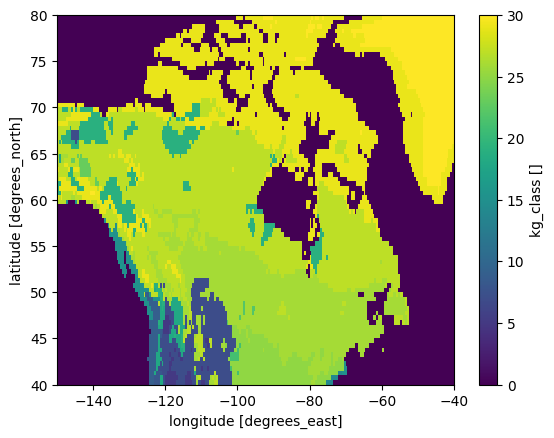

In [15]:
kopper_canada['kg_class'].plot()

In [16]:
postal_df = pd.read_csv(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\postal_codes\CanadianPostalCodes202403.csv')
postal_df

,POSTAL_CODE,CITY,PROVINCE_ABBR,TIME_ZONE,LATITUDE,LONGITUDE
0,J9P 7B7,VAL-D'OR,QC,5,48.071162,-77.872634
1,M4C 1S9,TORONTO,ON,5,43.688438,-79.307762
2,T8L 0X6,FORT SASKATCHEWAN,AB,7,53.684795,-113.230031
3,N3H 1K9,CAMBRIDGE,ON,5,43.400606,-80.359684
4,M8W 2C9,ETOBICOKE,ON,5,43.605177,-79.534144
...,...,...,...,...,...,...
900683,K1Y 3G1,OTTAWA,ON,5,45.399437,-75.728286
900684,K2M 2E8,KANATA,ON,5,45.302607,-75.855760
900685,E5N 5X3,HAMPTON,NB,4,45.538400,-65.838020
900686,G1R 1P8,QUEBEC,QC,5,46.810471,-71.218814


In [17]:
# custom rounding function to fix adjust lat/lon values to match with CDS agroclimate datasets
import math
def custom_round(num):
    normal_rounded_num = round(num)
    if normal_rounded_num == math.ceil(num):
        return normal_rounded_num - .25
    else:
        return normal_rounded_num + .25

In [18]:
postal_df['LATITUDE'] = postal_df['LATITUDE'].apply(lambda x: custom_round(x))
postal_df['LONGITUDE'] = postal_df['LONGITUDE'].apply(lambda x: custom_round(x))
postal_df.rename(columns={'LATITUDE': 'lat', 'LONGITUDE': 'lon'}, inplace=True)
postal_df

,POSTAL_CODE,CITY,PROVINCE_ABBR,TIME_ZONE,lat,lon
0,J9P 7B7,VAL-D'OR,QC,5,48.25,-77.75
1,M4C 1S9,TORONTO,ON,5,43.75,-79.25
2,T8L 0X6,FORT SASKATCHEWAN,AB,7,53.75,-113.25
3,N3H 1K9,CAMBRIDGE,ON,5,43.25,-80.25
4,M8W 2C9,ETOBICOKE,ON,5,43.75,-79.75
...,...,...,...,...,...,...
900683,K1Y 3G1,OTTAWA,ON,5,45.25,-75.75
900684,K2M 2E8,KANATA,ON,5,45.25,-75.75
900685,E5N 5X3,HAMPTON,NB,4,45.75,-65.75
900686,G1R 1P8,QUEBEC,QC,5,46.75,-71.25


In [28]:
cities = postal_df.drop(['POSTAL_CODE'], axis = 1)
cities = cities.drop_duplicates(subset=['CITY'])
cities.to_csv('city_to_loc.csv', index=False)

In [36]:
actual_cities = pd.read_csv(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\Self-updating-Farmer-s-Almanac\dataset\cities.csv')
actual_cities['name'] = actual_cities['name'].apply(lambda x: str.upper(x))
merged_cities = pd.merge(actual_cities, cities, left_on='name', right_on='CITY')
merged_merged_cities = pd.merge(actual_cities, merged_cities, how='outer', on='name')
merged_merged_cities.to_csv(r'C:\Users\kat\Documents\School\2024-WinterB\LSI\Self-updating-Farmer-s-Almanac\dataset\cities_partial_locations.csv')

In [20]:
koppen_df = kopper_canada['kg_class'].to_dataframe()
koppen_df.reset_index(inplace=True)
koppen_df = koppen_df.drop(koppen_df[koppen_df.kg_class == 0.0].index)
koppen_df

,lat,lon,kg_class
99,79.75,-100.25,29.0
100,79.75,-99.75,29.0
101,79.75,-99.25,29.0
102,79.75,-98.75,29.0
104,79.75,-97.75,29.0
...,...,...,...
17528,40.25,-75.75,25.0
17529,40.25,-75.25,14.0
17530,40.25,-74.75,14.0
17531,40.25,-74.25,14.0


In [21]:
koppen_df['kg_class'].unique()

array([29., 30., 27., 19.,  7., 23., 26., 18., 16., 15.,  9., 22.,  5.,
       25.,  8., 21., 14.], dtype=float32)

In [22]:
climate_dict = {29: 'polar (F)', 30: 'polar (F)', 27: 'temperate with humid winters (Df)', 19: 'temperate with dry winters (Dw)', 7: 'steppe or semiarid (Bs)', 23: 'temperate with dry winters (Dw)', 26: 'temperate with humid winters (Df)', 18: 'temperate with dry winters (Dw)', 16: 'subtropical humid (Cf)', 15: 'subtropical humid (Cf)', 9: 'subtropical dry summer (Cs)', 22: 'temperate with dry winters (Dw)', 5: 'desert or arid (Bw)', 25: 'temperate with humid winters (Df)', 8: 'subtropical dry summer (Cs)', 21: 'temperate with dry winters (Dw)', 14: 'subtropical humid (Cf)'}

In [23]:
koppen_df['Climate'] = koppen_df['kg_class'].apply(lambda x: climate_dict[int(x)])
koppen_df

,lat,lon,kg_class,Climate
99,79.75,-100.25,29.0,polar (F)
100,79.75,-99.75,29.0,polar (F)
101,79.75,-99.25,29.0,polar (F)
102,79.75,-98.75,29.0,polar (F)
104,79.75,-97.75,29.0,polar (F)
...,...,...,...,...
17528,40.25,-75.75,25.0,temperate with humid winters (Df)
17529,40.25,-75.25,14.0,subtropical humid (Cf)
17530,40.25,-74.75,14.0,subtropical humid (Cf)
17531,40.25,-74.25,14.0,subtropical humid (Cf)


In [24]:
crop_subset_climate3 = crop_subset_climate2[['species', 'Climate']]
crop_subset_climate3['species'] = crop_subset_climate3['species'].apply(lambda x: [x])
crop_subset_climate4 = crop_subset_climate3.groupby(['Climate']).agg("sum")
crop_subset_climate4

C:\Users\kat\AppData\Local\Temp\ipykernel_23584\3224320123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_subset_climate3['species'] = crop_subset_climate3['species'].apply(lambda x: [x])


,species
Climate,
boreal (E),"[Apium graveolens var. dulce, Brassica olerace..."
desert or arid (Bw),"[Amaranthus sp., Avena sativa, Brachychiton po..."
polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
steppe or semiarid (Bs),"[Abelmoschus esculentus, Acacia farnesiana, Ac..."
subtropical dry summer (Cs),"[Abelmoschus esculentus, Acacia farnesiana, Ag..."
subtropical dry winter (Cw),"[Abelmoschus esculentus, Agave sisalana, Alliu..."
subtropical humid (Cf),"[Abelmoschus esculentus, Adenanthera pavonina,..."
temperate continental (Dc),"[Allium ampeloprasum, Allium cepa, Allium fist..."
temperate oceanic (Do),"[Allium ampeloprasum, Allium cepa, Allium fist..."


In [25]:
climate_crops_df = koppen_df.merge(crop_subset_climate4, on="Climate")
climate_crops_df

,lat,lon,kg_class,Climate,species
0,79.75,-100.25,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
1,79.75,-99.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
2,79.75,-99.25,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
3,79.75,-98.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
4,79.75,-97.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni..."
...,...,...,...,...,...
11176,40.25,-75.75,25.0,temperate with humid winters (Df),"[Allium ampeloprasum, Allium cepa, Allium sati..."
11177,40.25,-75.25,14.0,subtropical humid (Cf),"[Abelmoschus esculentus, Adenanthera pavonina,..."
11178,40.25,-74.75,14.0,subtropical humid (Cf),"[Abelmoschus esculentus, Adenanthera pavonina,..."
11179,40.25,-74.25,14.0,subtropical humid (Cf),"[Abelmoschus esculentus, Adenanthera pavonina,..."


In [26]:
crops_climate_location_df = climate_crops_df.merge(postal_df, on=['lat', 'lon'])
crops_climate_location_df.drop(['TIME_ZONE'], axis=1, inplace=True)
crops_climate_location_df

,lat,lon,kg_class,Climate,species,POSTAL_CODE,CITY,PROVINCE_ABBR
0,79.75,-85.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni...",X0A 0G0,EUREKA,NU
1,76.25,-82.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni...",X0A 0J0,GRISE FIORD,NU
2,76.25,-82.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni...",X0A 0A8,GRISE FIORD,NU
3,74.75,-94.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni...",X0A 0A2,RESOLUTE,NU
4,74.75,-94.75,29.0,polar (F),"[Drosera rotundifolia, Equisetum arvense, Juni...",X0A 0V0,RESOLUTE,NU
...,...,...,...,...,...,...,...,...
900627,41.75,-82.75,25.0,temperate with humid winters (Df),"[Allium ampeloprasum, Allium cepa, Allium sati...",N9Y 3X5,KINGSVILLE,ON
900628,41.75,-82.75,25.0,temperate with humid winters (Df),"[Allium ampeloprasum, Allium cepa, Allium sati...",N0R 1M0,PELEE ISLAND,ON
900629,41.75,-82.75,25.0,temperate with humid winters (Df),"[Allium ampeloprasum, Allium cepa, Allium sati...",N9Y 3X4,KINGSVILLE,ON
900630,41.75,-82.75,25.0,temperate with humid winters (Df),"[Allium ampeloprasum, Allium cepa, Allium sati...",N9Y 3X3,KINGSVILLE,ON


In [27]:
#crops_climate_location_df.to_csv('backend_sample.csv', compression='gzip')

KeyboardInterrupt: 